###  Problem Statment :Prepare a prediction model for the profit of 50_startups data. 
### Do transformations for getting better predictions of profit .Creating a table containing Rsquared value for each prepared model.

In [3]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the csv file
startups = pd.read_csv('50_Startups.csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
# Dropping duplicate values if there any
startups[startups.duplicated(keep = False)]

,R&D Spend,Administration,Marketing Spend,State,Profit


There is no Null value present in side the data set and also the data types are appopriate in all attributes

In [11]:
# Dropping the unnecessery features
startups1 = startups.drop('State', axis = 1)
startups1.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [12]:
#Rename the R&D Spend as R&D_S , Administration as Admin and Marketing Spend as MktSpnd
startups2 = startups1.rename({'R&D Spend': 'RDS', 'Administration': 'Admin', 'Marketing Spend': 'MktSpnd'}, axis=1)
startups2.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [13]:
# Dropping duplicate values if there any
startups2[startups2.duplicated(keep = False)]

,RDS,Admin,MktSpnd,Profit


In [19]:
startups2.describe()

,RDS,Admin,MktSpnd,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


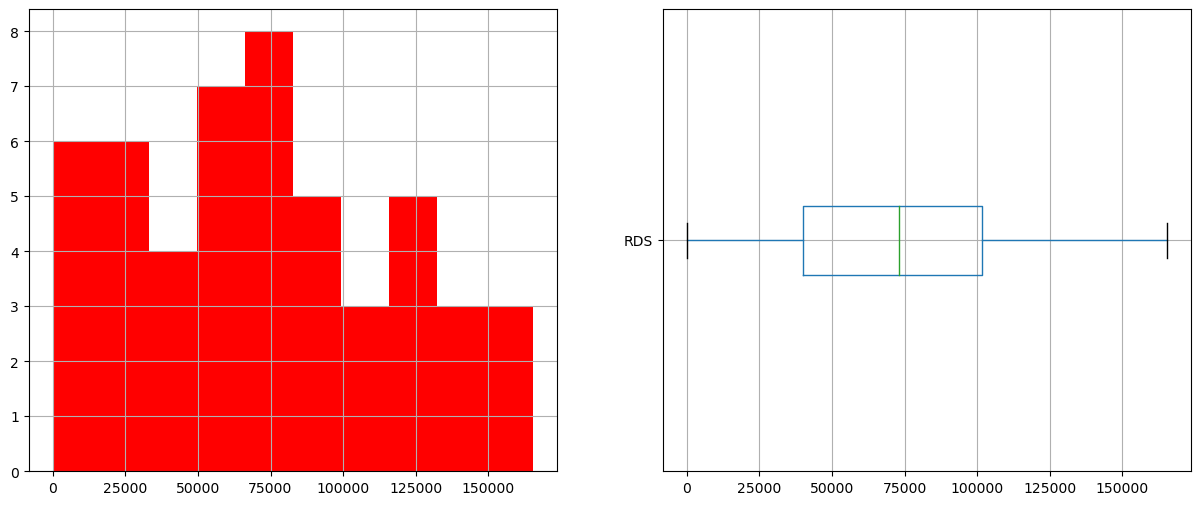

In [21]:
#check whether outliers are present in R&D_S column
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
startups2['RDS'].hist(color='red')

plt.subplot(1,2,2)
startups2.boxplot(column=['RDS'],vert=False)
plt.show()

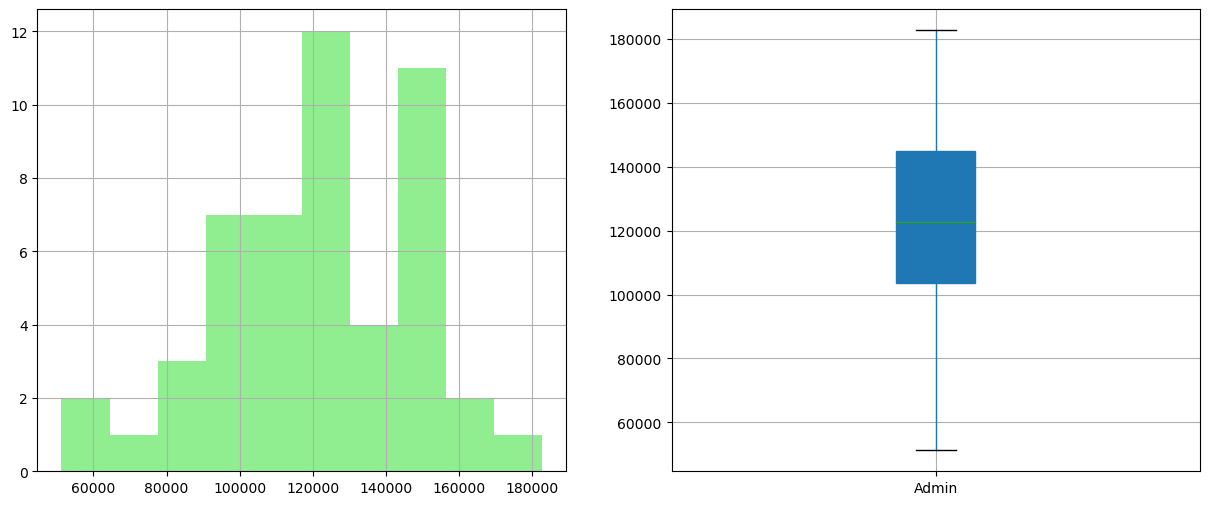

In [22]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
startups2['Admin'].hist(color='lightgreen')

plt.subplot(1,2,2)
startups2.boxplot(column=['Admin'],patch_artist=True)
plt.show()

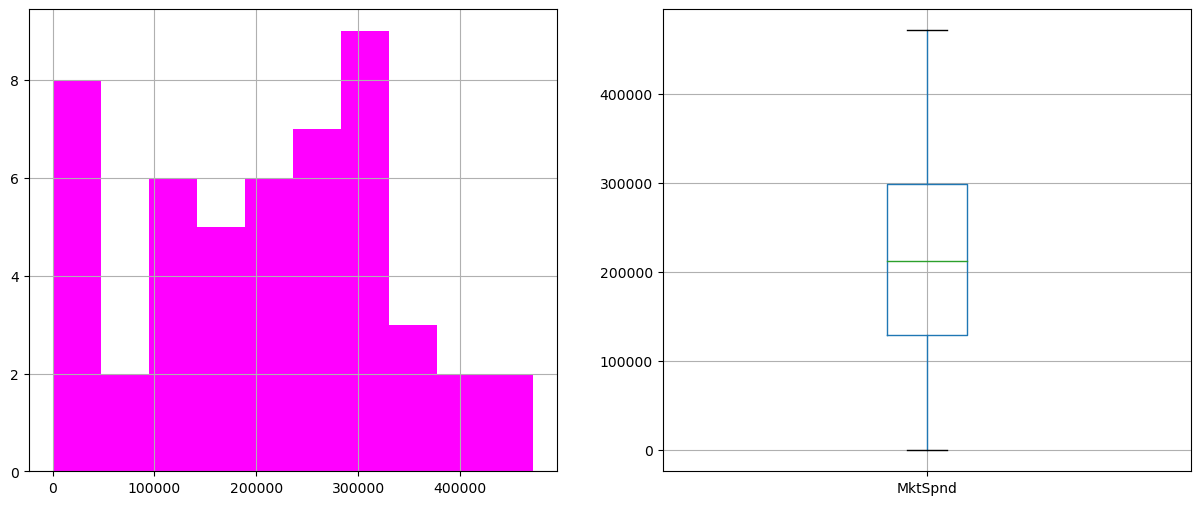

In [23]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
startups2['MktSpnd'].hist(color='magenta')

plt.subplot(1,2,2)
startups2.boxplot(column=['MktSpnd'])
plt.show()

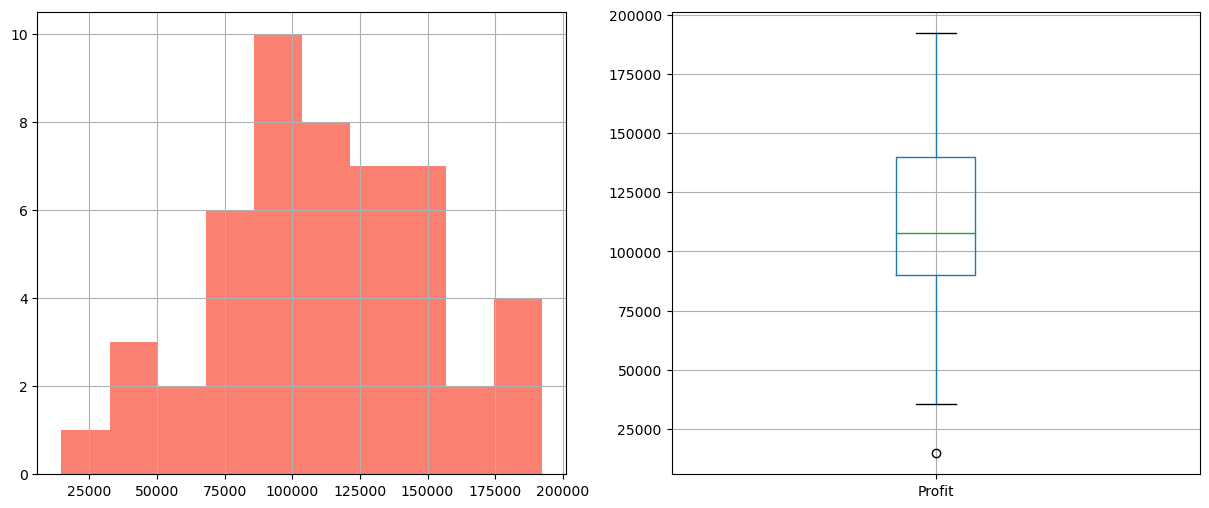

In [24]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
startups2['Profit'].hist(color='salmon')

plt.subplot(1,2,2)
startups2.boxplot(column=['Profit'])

plt.show()

### Kde plot-To check whether the datas are normally distributed or not

<AxesSubplot: xlabel='Profit', ylabel='Density'>

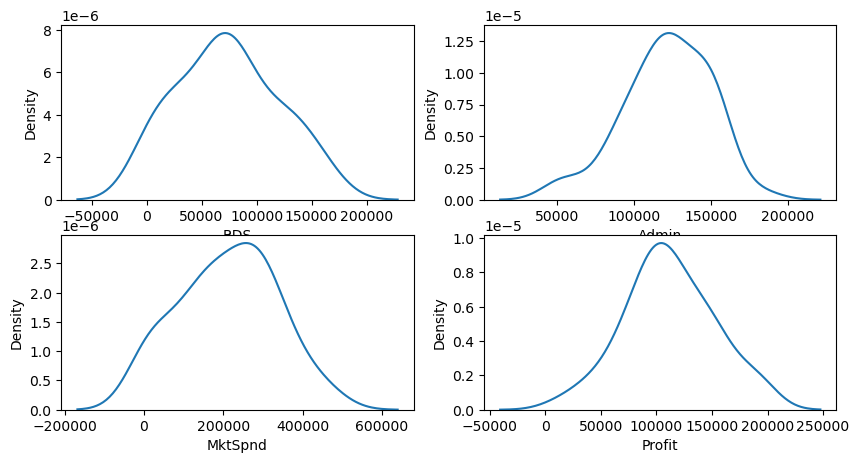

In [25]:
plt.figure(figsize = (10,5))

plt.subplot(2,2,1)
sns.kdeplot(startups2['RDS'])

plt.subplot(2,2,2)
sns.kdeplot(startups2['Admin'])

plt.subplot(2,2,3)
sns.kdeplot(startups2['MktSpnd'])

plt.subplot(2,2,4)
sns.kdeplot(startups2['Profit'])

In [26]:
#Correlation matrix
startups2.corr()

,RDS,Admin,MktSpnd,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MktSpnd,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


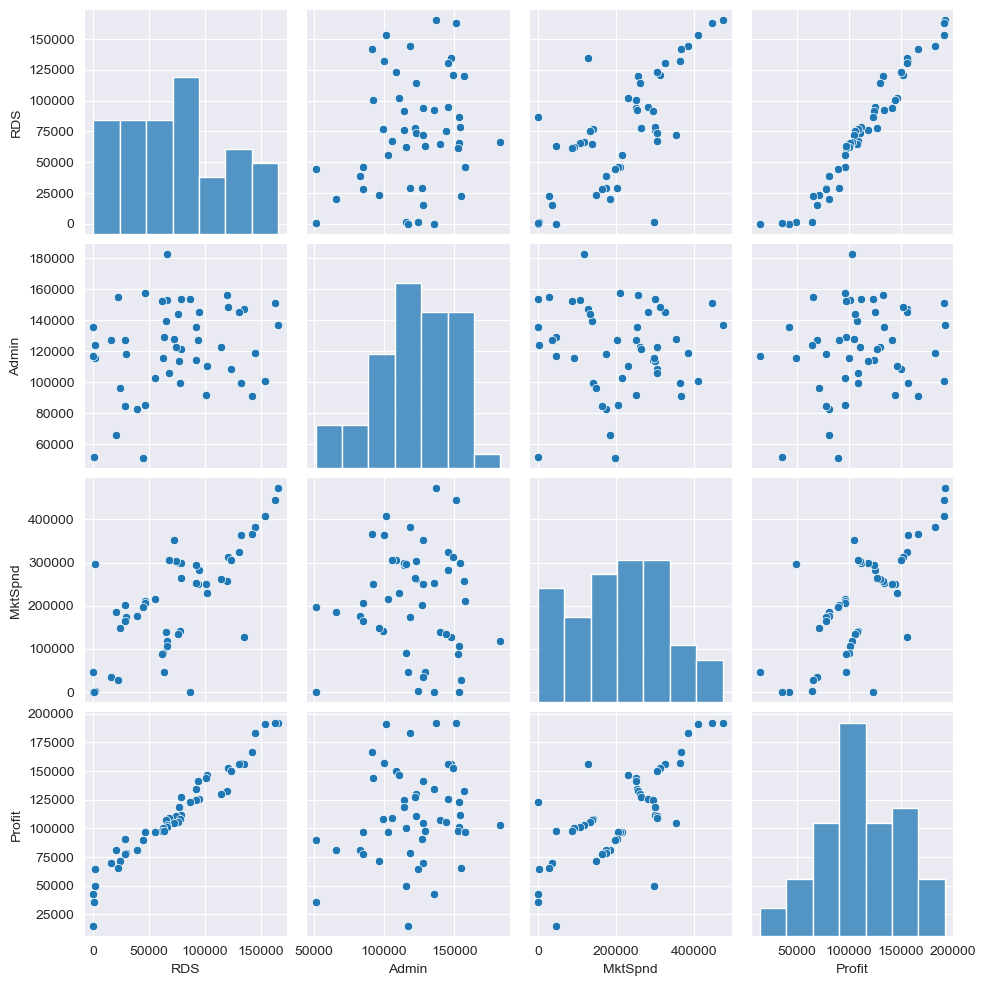

In [27]:
### Scatterplot between all variables, using pairplot
sns.set_style(style='darkgrid')
sns.pairplot(startups2)


### Model1- Creating a model to predict profit with better accuracy and low error, without using any transformation

In [28]:
model1 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups2).fit()

In [29]:
# Coefficients
model1.params

Intercept    50122.192990
RDS              0.805715
Admin           -0.026816
MktSpnd          0.027228
dtype: float64

In [30]:
# checking the t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept     7.626218
RDS          17.846374
Admin        -0.525507
MktSpnd       1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
Admin        6.017551e-01
MktSpnd      1.047168e-01
dtype: float64


In [31]:
# Rsquared and adjusted rsquared value
(model1.rsquared,model1.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        16:39:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MktSpnd        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred2= model1.predict(startups2)
#actual=startups2.Profit
strmse = sqrt(mean_squared_error(startups2.Profit,pred2))
print('RMSE: %f' % strmse) 

RMSE: 8855.344489


### Test for Normality of Residuals (Q-Q Plot)

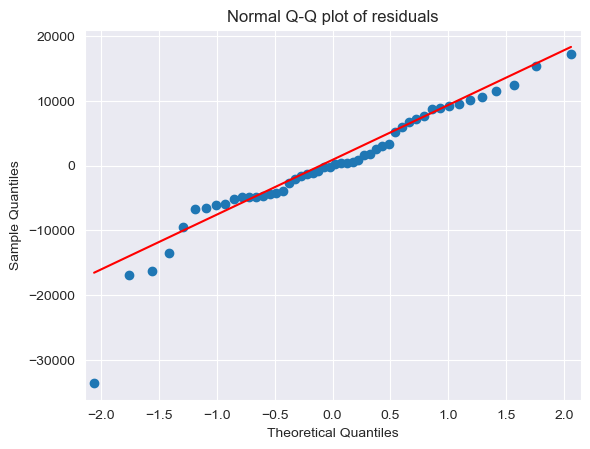

In [37]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [38]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

### Residual plot for homoscedasticity

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

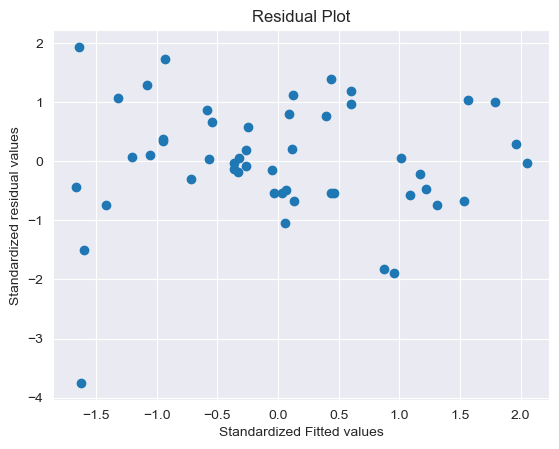

In [40]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Detecting influencers/outliers- By Cook's distance and influence plot

In [41]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

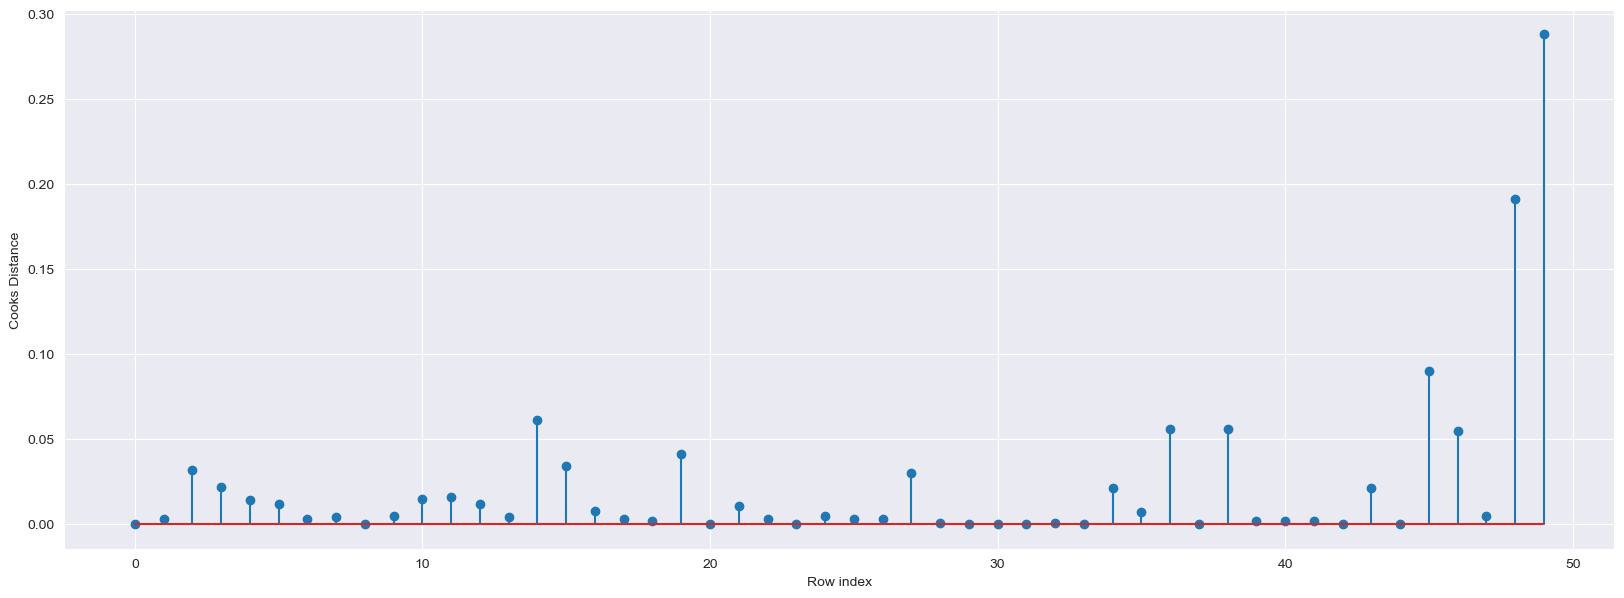

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of outliers
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

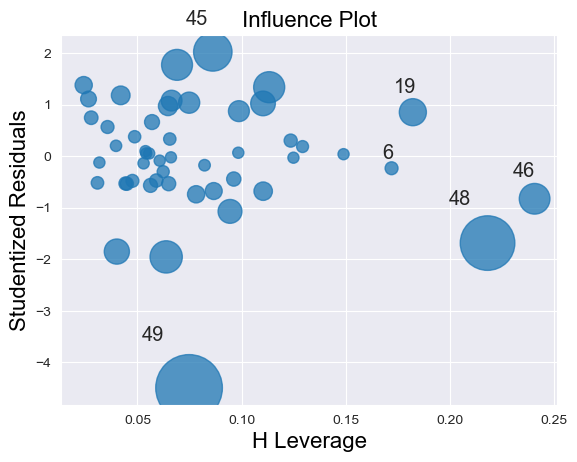

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [45]:
k = startups2.shape[1]
n = startups2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### From the visualization it is evident that at the index of 49  which is highly influenced so we are droping the data from our dataset

In [46]:
startups2[startups2.index.isin([49])]

,RDS,Admin,MktSpnd,Profit
49,0.0,116983.8,45173.06,14681.4


In [47]:
startups3=startups2.drop(startups2.index[[49]],axis=0).reset_index()
startups3

,index,RDS,Admin,MktSpnd,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [48]:
startups3=startups3.drop(['index'],axis=1)
startups3

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [49]:
startups3.head()

,RDS,Admin,MktSpnd,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Model2-Predicting a new model(with outlier removed dataset)

In [50]:
model2 = smf.ols('Profit~RDS+Admin+MktSpnd', data = startups3).fit()

In [51]:
##Coefficent
model2.params

Intercept    52382.439251
RDS              0.783002
Admin           -0.022201
MktSpnd          0.025234
dtype: float64

In [52]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           8.85e-32
Time:                        16:46:26   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
MktSpnd        0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred2= model2.predict(startups3)
#actual=startups3.Profit
strmse2 = sqrt(mean_squared_error(pred2,startups3.Profit))
print('RMSE: %f' % strmse2) 

RMSE: 7430.589094


### creating a table with all the obsevations

In [56]:
df = {'Model':['Model1','Model2'],'R_Squared Value':(model1.rsquared,model2.rsquared),
     "RMSE":(strmse,strmse2)
     }

In [57]:
R_Square_Table = pd.DataFrame(df)
R_Square_Table 

,Model,R_Squared Value,RMSE
0,Model1,0.950746,8855.344489
1,Model2,0.961316,7430.589094


### Comparing  From all the observations and calculations 
### it is evident that Model2 is the best model to predict profit with a better accuracy, 
### since it has the highest rsquared value and lowest rmse value.